In [13]:
%cd C:\Users\Peter\PycharmProjects\olfaction_evolution

C:\Users\Peter\PycharmProjects\olfaction_evolution


In [14]:
%pwd

'C:\\Users\\Peter\\PycharmProjects\\olfaction_evolution'

In [16]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tools
from pylab import *
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import os
import standard.analysis as sa
import tools
import matplotlib.pyplot as plt
import task
import tensorflow as tf
from model import FullModel
 
mpl.rcParams['font.size'] = 30
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['image.cmap']='jet'

%matplotlib inline

In [17]:
path = 'files/cluster_coding50'
x = tools.load_all_results(path, argLast=True)


['files/cluster_coding50\\000000', 'files/cluster_coding50\\000001', 'files/cluster_coding50\\000002', 'files/cluster_coding50\\000003', 'files/cluster_coding50\\000004', 'files/cluster_coding50\\000005']


In [18]:
x.keys()

dict_keys(['w_bins', 'lin_bins', 'epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'val_acc2', 'coding_level', 'coding_level_per_kc', 'coding_level_per_odor', 'log_hist', 'hist', 'kc_w_sum', 'lin_hist', 'sparsity', 'thres', 'sparsity_fixthres', 'NOISE_MODEL', 'N_CLASS', 'N_KC', 'N_ORN', 'N_ORN_DUPLICATION', 'N_PN', 'ORN_NOISE_STD', 'batch_size', 'coding_level_loss_alpha', 'combinatorial_density', 'data_dir', 'dataset', 'direct_glo', 'distort_input', 'extra_layer', 'extra_layer_neurons', 'hallem_path', 'has_special_odors', 'initial_pn2kc', 'initializer_or2orn', 'initializer_orn2pn', 'initializer_pn2kc', 'kc_bias', 'kc_dropout', 'kc_dropout_rate', 'kc_inputs', 'kc_loss', 'kc_loss_alpha', 'kc_loss_beta', 'kc_noise', 'kc_noise_std', 'kc_norm_post', 'kc_norm_pre', 'kc_prune_threshold', 'kc_prune_weak_weights', 'label_type', 'lr', 'mask_orn_activation_column', 'mask_orn_activation_row', 'max_epoch', 'mean_subtract_pn2kc', 'model', 'n_class_valence', 'n_combinatorial_classes', 'n_pro

In [19]:
w_bins_log = np.linspace(-20, 5, 200)

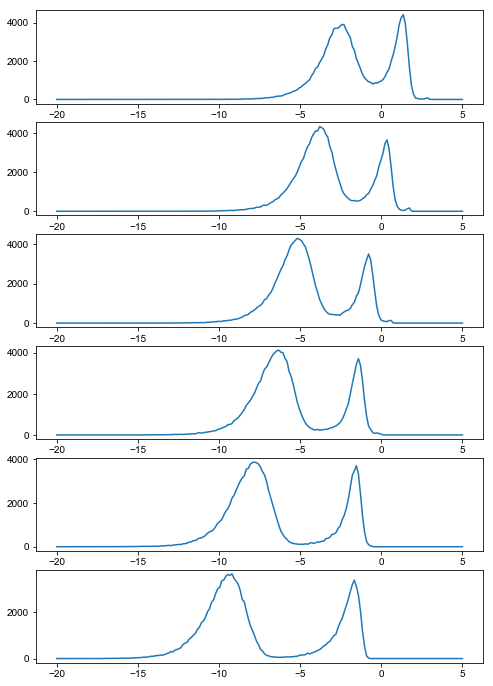

In [20]:
fig, axs =plt.subplots(6,figsize=(8,12))
for i in range(x['log_hist'].shape[0]):
    axs[i].plot(w_bins_log,x['log_hist'][i].T)

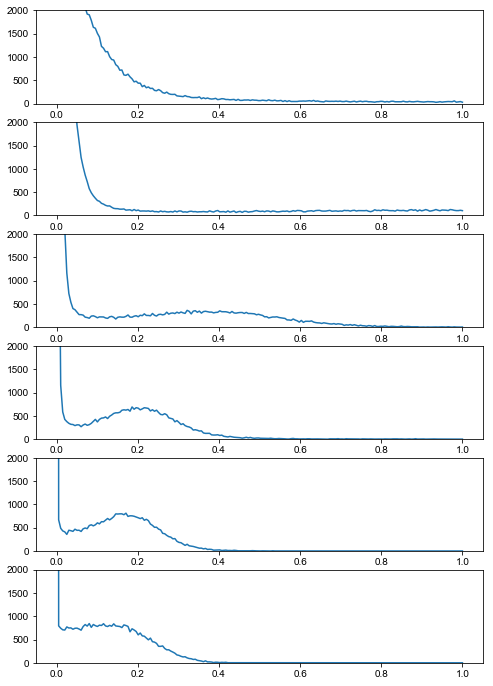

In [21]:
fig, axs =plt.subplots(6,figsize=(8,12))
lin_bins = np.linspace(0, 1, 200)
for i in range(x['log_hist'].shape[0]):
    axs[i].plot(lin_bins,x['hist'][i].T)
    plt.sca(axs[i])
    plt.ylim([0, 2000])

In [22]:
x.keys()

dict_keys(['w_bins', 'lin_bins', 'epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'val_acc2', 'coding_level', 'coding_level_per_kc', 'coding_level_per_odor', 'log_hist', 'hist', 'kc_w_sum', 'lin_hist', 'sparsity', 'thres', 'sparsity_fixthres', 'NOISE_MODEL', 'N_CLASS', 'N_KC', 'N_ORN', 'N_ORN_DUPLICATION', 'N_PN', 'ORN_NOISE_STD', 'batch_size', 'coding_level_loss_alpha', 'combinatorial_density', 'data_dir', 'dataset', 'direct_glo', 'distort_input', 'extra_layer', 'extra_layer_neurons', 'hallem_path', 'has_special_odors', 'initial_pn2kc', 'initializer_or2orn', 'initializer_orn2pn', 'initializer_pn2kc', 'kc_bias', 'kc_dropout', 'kc_dropout_rate', 'kc_inputs', 'kc_loss', 'kc_loss_alpha', 'kc_loss_beta', 'kc_noise', 'kc_noise_std', 'kc_norm_post', 'kc_norm_pre', 'kc_prune_threshold', 'kc_prune_weak_weights', 'label_type', 'lr', 'mask_orn_activation_column', 'mask_orn_activation_row', 'max_epoch', 'mean_subtract_pn2kc', 'model', 'n_class_valence', 'n_combinatorial_classes', 'n_pro

In [23]:
x['coding_level']

array([0.20484604, 0.2       , 0.20728262, 0.2       , 0.20687393,
       0.2       , 0.20375894, 0.2       , 0.20085015, 0.2       ,
       0.20026475, 0.2       ])

In [24]:
x['train_acc']

array([0.7578125 , 0.7578125 , 0.71875   , 0.75      , 0.7578125 ,
       0.73046875], dtype=float32)

In [25]:
x['sparsity'].mean(axis=1)

array([14.2676, 12.2444, 11.7572, 12.044 , 13.1356, 15.5128])

In [26]:
x['lr']

array([3.e-03, 1.e-03, 3.e-04, 1.e-04, 3.e-05, 1.e-05])

ValueError: x and y must have same first dimension, but have shapes (6,) and (12,)

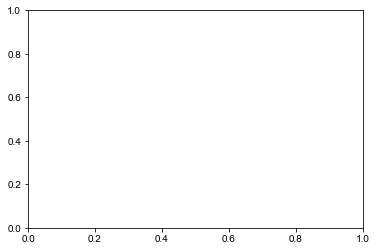

In [27]:
plt.plot(np.log(x['lr']), x['coding_level'], '*')
plt.xticks(np.log(x['lr']),x['lr'])

([<matplotlib.axis.XTick at 0x21c5da1e978>,
 <a list of 6 Text xticklabel objects>)

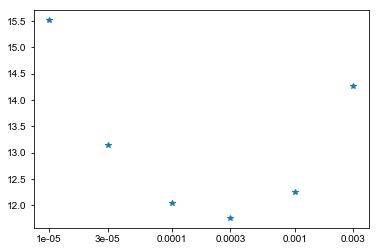

In [28]:
plt.plot(np.log(x['lr']), x['sparsity'].mean(axis=1), '*')
plt.xticks(np.log(x['lr']),x['lr'])

([<matplotlib.axis.XTick at 0x21c5dbf08d0>,
 <a list of 6 Text xticklabel objects>)

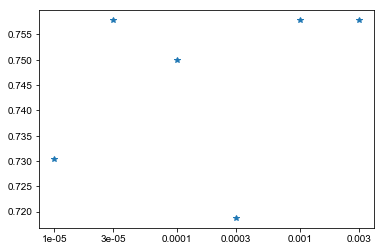

In [29]:
plt.plot(np.log(x['lr']), x['train_acc'], '*')
plt.xticks(np.log(x['lr']),x['lr'])

In [30]:
x['lr']

array([3.e-03, 1.e-03, 3.e-04, 1.e-04, 3.e-05, 1.e-05])

In [31]:
w_glo = tools.load_pickle(path, 'w_glo')[4]

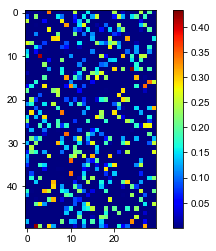

In [32]:
plt.imshow(w_glo[:,:30])
plt.colorbar()

(0, 1000)

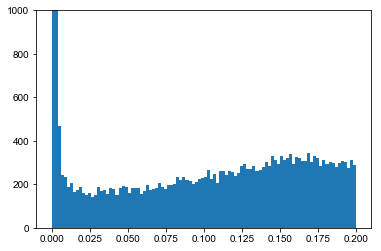

In [33]:
_ = plt.hist(w_glo.flatten(), bins=100, range = [0, .2])
plt.ylim([0, 1000])

In [34]:
log = tools.load_all_results(path, argLast=False)

['files/cluster_coding50\\000000', 'files/cluster_coding50\\000001', 'files/cluster_coding50\\000002', 'files/cluster_coding50\\000003', 'files/cluster_coding50\\000004', 'files/cluster_coding50\\000005']


C:\Users\Peter\PycharmProjects\olfaction_evolution\tools.py:224: RuntimeWarning: divide by zero encountered in log
  res['train_logloss'] = np.log(res['train_loss'])


In [35]:
sp = np.mean(log['sparsity'], axis=2)

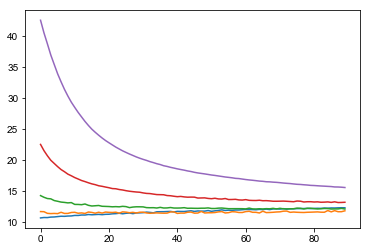

In [36]:
plt.plot(sp[1:,10:].T)